In [23]:
from modules.load import *
from modules.lstm import *
sns.set()
from tensorflow.keras.models import load_model

0:テーブル  
1:椅子  
2:デニム  
3:ダンボール  
4:ペットボトル  
5:指  
6:マジックテープ  
7:スポンジ  
8:ガムテープ  
9:タオル  

# データの集計

In [24]:
#標準化前
def plot_g(title,x,y,start,end,save=False):
    #データの波形の確認の式
    #figureヲ宣言
    flg = plt.figure(figsize=(12,4))
    flg = plt.title(title)
    #x:0スタートなので1を追加  1あたり0.09sなので情報を追加
    flg = plt.plot((x+1)*0.09, y)
    flg = plt.xlabel("time[s]")
    flg = plt.ylabel("Voltage[V]")          
    # 0-9秒
    flg = plt.xlim(start,end)
    # おおよそ2.3-2.5を推移
    flg = plt.ylim(2.4, 2.8)
    flg = plt.show()
    if save ==True:
        name = input("名前を決めてください:")
        fig.savefig("img.png")
        
#標準化後
def standard_plot_g(title,x,y,start,end,save=False):
    #データの波形の確認の式
    #figureヲ宣言
    flg = plt.figure()
    flg = plt.title(title)
    #x:0スタートなので1を追加  1あたり0.09sなので情報を追加
    flg = plt.plot((x+1)*0.09, y)
    flg = plt.xlabel("time[s]")
    flg = plt.ylabel("Voltage[V]")          
    # 0-9秒
    flg = plt.xlim(start,end)
    # おおよそ2.3-2.5を推移
    flg = plt.ylim(-2.0, 2.0)
    flg = plt.show()
    if save ==True:
        name = input("名前を決めてください:")
        fig.savefig("img.png")

In [25]:
#学習用データ
df_yubi = load("finger3.csv")
df_table = load("tab3.csv")
df_isu = load("isuisu3.csv")
df_petto = load("petto2.csv")
df_dan = load("cardboard4.csv")
df_denim = load("denideni4.csv")
df_magic= load("magic3.csv")
df_gam = load("gamgam3.csv")
df_sponji = load("smonji5.csv")
df_taoru = load("taoru3.csv")

In [26]:
#データを纏める用に作製
df_list = [df_table,df_isu,df_denim,df_dan,df_petto,df_yubi,df_magic,df_sponji,df_gam,df_taoru]
data_col = ["table","chair","denim","cardboard" ,"pettobottle","finger","magic tape" ,"sponge","gum tape","taoru"]

In [27]:
def get_xy(data):
    print("data must have only figure data")
    x = data.iloc[:, 0]
    x = np.arange(0,10000,1)
    y = data.iloc[:, 1]
    y = signal.resample(y,10000)
    y = y.astype("float32")
    return x, y

In [28]:
#データセットの作製
k = []
for i in df_list:
    x,y = get_xy(i)
    k.append(y)

data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data


In [29]:
#x軸用
x

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [30]:
#ディクショナリー型のデータセットを作製　key:value = label:wave
df_dict = dict(zip(data_col,k))

In [31]:
df_dict 

{'table': array([2.74     , 2.7397242, 2.739476 , ..., 2.7407184, 2.740523 ,
        2.7402754], dtype=float32),
 'chair': array([2.57     , 2.5694578, 2.5681348, ..., 2.5639122, 2.5674   ,
        2.569396 ], dtype=float32),
 'denim': array([2.75     , 2.7526228, 2.7551363, ..., 2.741891 , 2.7445798,
        2.747303 ], dtype=float32),
 'cardboard': array([2.73     , 2.7309318, 2.7325096, ..., 2.7320704, 2.7305126,
        2.7298336], dtype=float32),
 'pettobottle': array([2.6      , 2.6000354, 2.6002262, ..., 2.601263 , 2.6005878,
        2.6001723], dtype=float32),
 'finger': array([2.51     , 2.5046377, 2.5010061, ..., 2.53603  , 2.5258327,
        2.5170953], dtype=float32),
 'magic tape': array([2.7      , 2.688871 , 2.6740978, ..., 2.7056985, 2.7086809,
        2.7067478], dtype=float32),
 'sponge': array([2.59     , 2.5826423, 2.5749218, ..., 2.6058328, 2.6019464,
        2.5965645], dtype=float32),
 'gum tape': array([2.74     , 2.7377923, 2.7361078, ..., 2.74898  , 2.745692 ,

In [32]:
x

array([   0,    1,    2, ..., 9997, 9998, 9999])

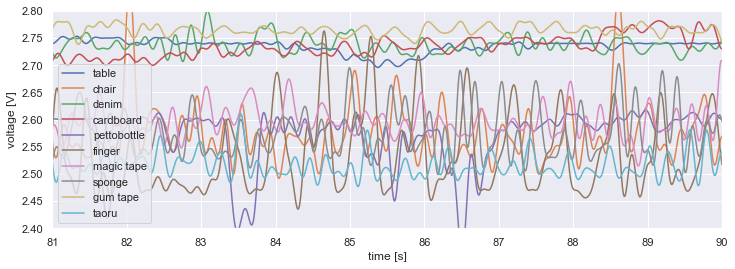

In [33]:
def show_concat(df_dict):
    plt.figure(figsize=(12,4))
    for i in df_dict:
        plt.plot((x+1)*0.009, df_dict[i],  label=i)
    plt.xlim(81,90)
    plt.ylim(2.4,2.8)
    plt.xlabel("time [s]")
    plt.ylabel("voltage [V]")
    plt.legend(loc='lower left')
    plt.show()

show_concat(df_dict)

# 標準化

In [34]:
#データの標準化の一括
share = []
def standard(df_dict,created_list=[]):
    for i in df_dict:
        y = np.array(df_dict[i]).reshape(-1,1)
        y = scale(y)
        a,y= np.array(y)
        y = np.array(y)
        created_list.append(y)
    return created_list

In [35]:
created_list = standard(df_dict,created_list=[])

In [36]:
created_list

[array([[0.23061767],
        [0.21831286],
        [0.20724173],
        ...,
        [0.26266122],
        [0.25395107],
        [0.2429012 ]], dtype=float32),
 array([[ 0.02844481],
        [ 0.01559269],
        [-0.01576898],
        ...,
        [-0.11586745],
        [-0.03318773],
        [ 0.01412888]], dtype=float32),
 array([[0.50381804],
        [0.6317402 ],
        [0.75432503],
        ...,
        [0.10831872],
        [0.2394619 ],
        [0.37227952]], dtype=float32),
 array([[0.6463053 ],
        [0.70781577],
        [0.8119806 ],
        ...,
        [0.78298825],
        [0.6801455 ],
        [0.63531905]], dtype=float32),
 array([[0.55679977],
        [0.5573554 ],
        [0.56033856],
        ...,
        [0.5765559 ],
        [0.56599545],
        [0.5594958 ]], dtype=float32),
 array([[-0.256236  ],
        [-0.34580612],
        [-0.40646738],
        ...,
        [ 0.17856422],
        [ 0.00822918],
        [-0.1377171 ]], dtype=float32),
 array([[2.10940

In [37]:
#ディクショナリー型のデータセットを作製　key:value = label:wave
df_dict_std = dict(zip(data_col, created_list))

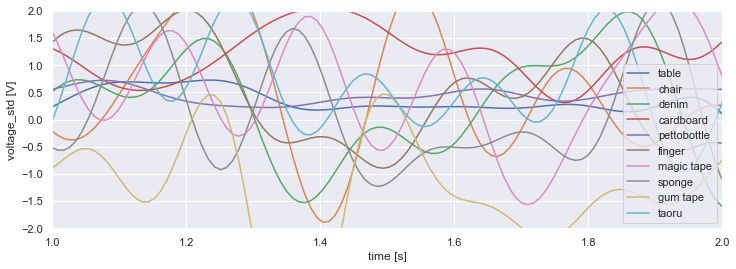

In [38]:
def show_concat_std(df_dict_std):
    plt.figure(figsize=(12,4))
    for i in df_dict:
        plt.plot((x+1)*0.009, df_dict_std[i],  label=i)
    plt.xlim(1,2)
    plt.ylim(-2,2)
    plt.xlabel("time [s]")
    plt.ylabel("voltage_std [V]")
    plt.legend()
    plt.show()

show_concat_std(df_dict_std)

# DataSetの合成

In [39]:
#名前をラベルにしたDataSet
def make_dataset_name(time_steps,df_dict):
    x, y, z =[],[],[]
    h=0
    for i in df_dict:
        data, target = [], []
        maxlen = time_steps

        for j in range(len(df_dict[i])-maxlen):
            data.append(df_dict[i][j:j + maxlen])
            target.append(i)

        re_data = np.array(data).reshape(len(data), maxlen,1 )
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data=pd.DataFrame(csv_data)
        csv_data["LABEL"] =re_target
        h+=1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)
        

    return x,y,z


#ラベルを数値にしたDataSet
def make_dataset(time_steps,df_dict):
    x, y, z =[],[],[]
    h=0
    for i in df_dict:
        data, target = [], []
        maxlen = time_steps

        for j in range(len(df_dict[i])-maxlen):
            data.append(df_dict[i][j:j + maxlen])
            target.append(h)

        re_data = np.array(data).reshape(len(data), maxlen,1 )
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data=pd.DataFrame(csv_data)
        csv_data["LABEL"] =re_target
        h+=1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)
        

    return x,y,z


#ラベルを数値にしたDataSet ストライド付き
def make_dataset_stride(time_steps,df_dict,stride):
    x, y, z =[],[],[]
    h=0
    for i in df_dict:
        data, target = [], []
        maxlen = time_steps

        for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
            data.append(df_dict[i][j*stride:j*stride + maxlen])
            target.append(h)

        re_data = np.array(data).reshape(len(data), maxlen,1 )
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data=pd.DataFrame(csv_data)
        csv_data["LABEL"] =re_target
        h+=1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)
        

    return x,y,z

In [43]:
x,y,z=make_dataset(100,df_dict_std)

In [123]:
xx,yy,zz=make_dataset_stride(100,df_dict_std,5)

In [124]:
zz[0].shape

(1980, 101)

In [125]:
zz[0]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,LABEL
0,0.230618,0.218313,0.207242,0.198510,0.193001,0.191268,0.193448,0.199297,0.208135,0.218983,...,-0.254715,-0.284812,-0.305115,-0.315537,-0.316526,-0.308911,-0.293810,-0.272422,-0.245941,0
1,0.191268,0.193448,0.199297,0.208135,0.218983,0.230618,0.241742,0.251090,0.257641,0.260694,...,-0.308911,-0.293810,-0.272422,-0.245941,-0.215450,-0.181790,-0.145546,-0.107036,-0.066314,0
2,0.230618,0.241742,0.251090,0.257641,0.260694,0.260034,0.255972,0.249389,0.241689,0.234712,...,-0.181790,-0.145546,-0.107036,-0.066314,-0.023285,0.022234,0.070421,0.121342,0.174879,0
3,0.260034,0.255972,0.249389,0.241689,0.234712,0.230618,0.231681,0.240136,0.257918,0.286494,...,0.022234,0.070421,0.121342,0.174879,0.230618,0.287877,0.345700,0.402864,0.458007,0
4,0.230618,0.231681,0.240136,0.257918,0.286494,0.326706,0.378626,0.441501,0.513777,0.593136,...,0.287877,0.345700,0.402864,0.458007,0.509704,0.556562,0.597390,0.631295,0.657755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.258790,0.257110,0.252919,0.246666,0.238987,0.230618,0.222375,0.215027,0.209284,0.205657,...,0.198563,0.203190,0.210571,0.220014,0.230618,0.241338,0.251133,0.259013,0.264203,0
1976,0.230618,0.222375,0.215027,0.209284,0.205657,0.204498,0.205870,0.209635,0.215420,0.222641,...,0.241338,0.251133,0.259013,0.264203,0.266139,0.264597,0.259683,0.251856,0.241848,0
1977,0.204498,0.205870,0.209635,0.215420,0.222641,0.230618,0.238562,0.245698,0.251356,0.254983,...,0.264597,0.259683,0.251856,0.241848,0.230618,0.219259,0.208880,0.200531,0.195054,0
1978,0.230618,0.238562,0.245698,0.251356,0.254983,0.256227,0.254972,0.251335,0.245677,0.238541,...,0.219259,0.208880,0.200531,0.195054,0.193023,0.194671,0.199872,0.208167,0.218749,0


In [126]:
z[1]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,LABEL
0,0.028445,0.015593,-0.015769,-0.055026,-0.090638,-0.111284,-0.106955,-0.069930,0.004425,0.117149,...,-0.204222,-0.170854,-0.111267,-0.030170,0.066103,0.170039,0.273466,0.368224,0.446715,1
1,0.015593,-0.015769,-0.055026,-0.090638,-0.111284,-0.106955,-0.069930,0.004425,0.117149,0.265497,...,-0.170854,-0.111267,-0.030170,0.066103,0.170039,0.273466,0.368224,0.446715,0.502549,1
2,-0.015769,-0.055026,-0.090638,-0.111284,-0.106955,-0.069930,0.004425,0.117149,0.265497,0.443092,...,-0.111267,-0.030170,0.066103,0.170039,0.273466,0.368224,0.446715,0.502549,0.530989,1
3,-0.055026,-0.090638,-0.111284,-0.106955,-0.069930,0.004425,0.117149,0.265497,0.443092,0.640362,...,-0.030170,0.066103,0.170039,0.273466,0.368224,0.446715,0.502549,0.530989,0.529344,1
4,-0.090638,-0.111284,-0.106955,-0.069930,0.004425,0.117149,0.265497,0.443092,0.640362,0.845295,...,0.066103,0.170039,0.273466,0.368224,0.446715,0.502549,0.530989,0.529344,0.497152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,1.018137,0.840728,0.644171,0.436932,0.228455,0.028445,-0.153887,-0.310577,-0.435531,-0.525061,...,-1.103814,-1.208586,-1.250047,-1.230656,-1.156816,-1.038270,-0.887283,-0.717623,-0.543390,1
9896,0.840728,0.644171,0.436932,0.228455,0.028445,-0.153887,-0.310577,-0.435531,-0.525061,-0.578182,...,-1.208586,-1.250047,-1.230656,-1.156816,-1.038270,-0.887283,-0.717623,-0.543390,-0.377878,1
9897,0.644171,0.436932,0.228455,0.028445,-0.153887,-0.310577,-0.435531,-0.525061,-0.578182,-0.596720,...,-1.250047,-1.230656,-1.156816,-1.038270,-0.887283,-0.717623,-0.543390,-0.377878,-0.232497,1
9898,0.436932,0.228455,0.028445,-0.153887,-0.310577,-0.435531,-0.525061,-0.578182,-0.596720,-0.585168,...,-1.230656,-1.156816,-1.038270,-0.887283,-0.717623,-0.543390,-0.377878,-0.232497,-0.115867,1


# 再利用可能なようにcsvファイルとして登録

In [127]:
con = pd.DataFrame(index=[], columns=[])

In [128]:
def make_csv(name,dataset,data_col,save_data=False):
    con = pd.DataFrame(index=[], columns=[])
    for i,j in enumerate(dataset):
        #save_dataをTrueにすると作製
        con=pd.concat([con,j])
        if save_data:
            j.to_csv("{}{}.csv".format(data_col[i],name))
    return con

In [129]:
conm = make_csv("テストだよ",zz,data_col)

In [130]:
conm

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,LABEL
0,0.230618,0.218313,0.207242,0.198510,0.193001,0.191268,0.193448,0.199297,0.208135,0.218983,...,-0.254715,-0.284812,-0.305115,-0.315537,-0.316526,-0.308911,-0.293810,-0.272422,-0.245941,0
1,0.191268,0.193448,0.199297,0.208135,0.218983,0.230618,0.241742,0.251090,0.257641,0.260694,...,-0.308911,-0.293810,-0.272422,-0.245941,-0.215450,-0.181790,-0.145546,-0.107036,-0.066314,0
2,0.230618,0.241742,0.251090,0.257641,0.260694,0.260034,0.255972,0.249389,0.241689,0.234712,...,-0.181790,-0.145546,-0.107036,-0.066314,-0.023285,0.022234,0.070421,0.121342,0.174879,0
3,0.260034,0.255972,0.249389,0.241689,0.234712,0.230618,0.231681,0.240136,0.257918,0.286494,...,0.022234,0.070421,0.121342,0.174879,0.230618,0.287877,0.345700,0.402864,0.458007,0
4,0.230618,0.231681,0.240136,0.257918,0.286494,0.326706,0.378626,0.441501,0.513777,0.593136,...,0.287877,0.345700,0.402864,0.458007,0.509704,0.556562,0.597390,0.631295,0.657755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,-1.370222,-1.384551,-1.378915,-1.347380,-1.284908,-1.187951,-1.055103,-0.887561,-0.689354,-0.467435,...,-1.719109,-1.403490,-1.001197,-0.538583,-0.046057,0.444045,0.899726,1.291665,1.595213,9
1976,-1.187951,-1.055103,-0.887561,-0.689354,-0.467435,-0.231395,0.006977,0.234386,0.436985,0.601269,...,0.444045,0.899726,1.291665,1.595213,1.792167,1.871982,1.832433,1.679592,1.427281,9
1977,-0.231395,0.006977,0.234386,0.436985,0.601269,0.715205,0.769165,0.756759,0.675511,0.527181,...,1.871982,1.832433,1.679592,1.427281,1.095836,0.710495,0.299363,-0.108720,-0.486384,9
1978,0.715205,0.769165,0.756759,0.675511,0.527181,0.317840,0.057606,-0.239953,-0.558630,-0.880682,...,0.710495,0.299363,-0.108720,-0.486384,-0.809725,-1.059967,-1.224723,-1.298638,-1.283547,9


In [131]:
def make_data(concat):
    ex = concat.iloc[:,:-1]
    ex = np.array(ex)
    ex=ex.reshape(-1,ex.shape[1],1)
    label = concat.iloc[:,-1]
    label = np.array(label)
    label = label.reshape(-1,1)
    label =one_hot(label)
    
    return ex,label

ex,label = make_data(conm)

In [132]:
X_train, X_test, Y_train, Y_test = split(ex,label)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.1


In [133]:
X_test.shape

(1980, 100, 1)

# LSTM系列

In [134]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional,LSTM,TimeDistributed
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [135]:
class Deep:
    
    def __init__(self,batchsize=32,unit=256,label_num=10,dropout=0.3,epochs=30):
        self.batchsize = batchsize
        self.unit = unit
        self.label_num = label_num
        self.dropout = dropout
        self.es = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')
        self.epochs = epochs
    
    def lstm(self,X_train):
        optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model = Sequential()
        model.add(LSTM(self.unit, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = False))
        model.add(Dropout(self.dropout))
        model.add(Dense(self.label_num))
        model.add(Activation("softmax"))
        model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])
        model.summary()
        return model
    
    def learn(self,model,X_train, Y_train,validation_split):
        history = model.fit(X_train, Y_train, batch_size=self.batchsize, epochs=self.epochs,validation_split=validation_split,callbacks=self.es)
        return history
    
    def plot_history(self,history):
    # model loss graph

        def plot_history_loss(fit):
            axL.plot(fit.history['loss'], label="loss for training")
            axL.plot(fit.history['val_loss'],label="loss for validation")
            axL.set_title('model loss')
            axL.set_xlabel('epoch')
            axL.set_ylabel('loss')
            axL.legend(loc='upper right')

        # model accuracy graph

        def plot_history_accuracy(fit):
            axR.plot(fit.history['accuracy'],
                     label="accuracy for training")
            axR.plot(fit.history['val_accuracy'],label="accuracy for validation")
            axR.set_title('model accuracy')
            axR.set_xlabel('epoch')
            axR.set_ylabel('accuracy')
            axR.legend(loc='lower right')

        ig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 5))
        plt.subplots_adjust(wspace=0.5)
        plot_history_loss(history)
        plot_history_accuracy(history)
        
    def model_save(self,model,model_name):
        model.save("{}.h5".format(model_name))
        model.save_weights("{}_weight.h5".format(model_name))
    
    def test(self,model,X_test,Y_test):
        evaluate_model(model,X_test,Y_test)

In [136]:
ls = Deep(epochs=30)

In [137]:
model = load_model("model_100_5_学習2test.h5")
model.load_weights("model_100_5_学習2test_weight.h5")

In [138]:
history = ls.learn(model,X_train, Y_train,validation_split=0.1)

Epoch 1/30
502/502 [==============================] - 21s 42ms/step - loss: 1.4404 - accuracy: 0.5284 - val_loss: 1.0515 - val_accuracy: 0.6364
Epoch 2/30
502/502 [==============================] - 21s 43ms/step - loss: 0.9329 - accuracy: 0.6735 - val_loss: 0.9591 - val_accuracy: 0.6846
Epoch 3/30
502/502 [==============================] - 22s 44ms/step - loss: 0.7652 - accuracy: 0.7340 - val_loss: 0.8601 - val_accuracy: 0.7132
Epoch 4/30
502/502 [==============================] - 22s 44ms/step - loss: 0.6497 - accuracy: 0.7788 - val_loss: 0.6580 - val_accuracy: 0.7767
Epoch 5/30
502/502 [==============================] - 24s 48ms/step - loss: 0.5598 - accuracy: 0.8079 - val_loss: 0.5629 - val_accuracy: 0.8120
Epoch 6/30
502/502 [==============================] - 24s 48ms/step - loss: 0.5024 - accuracy: 0.8315 - val_loss: 0.4669 - val_accuracy: 0.8423
Epoch 7/30
502/502 [==============================] - 24s 47ms/step - loss: 0.4279 - accuracy: 0.8564 - val_loss: 0.4992 - val_accuracy:

In [139]:
ls.test(model,X_test,Y_test)

62/62 [==============================] - 1s 14ms/step - loss: 0.3148 - accuracy: 0.9076
loss: 0.31483909487724304 accuracy: 0.907575786113739


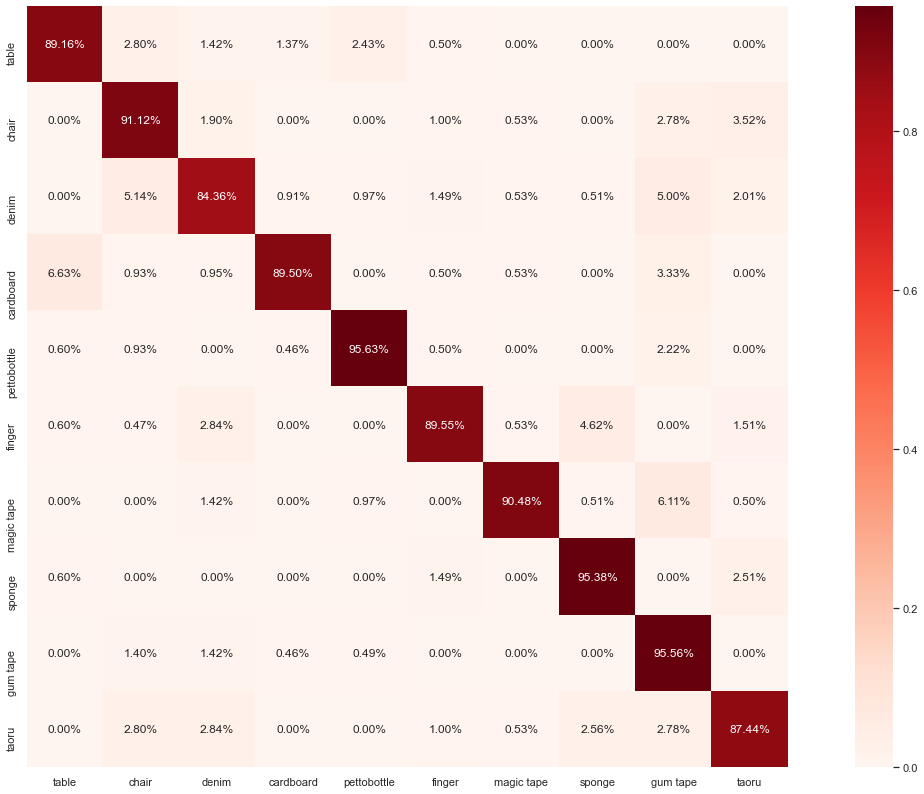

In [140]:
pred = model.predict(X_test)

#予測データ
y_pred = np.argmax(pred,axis=1)

#正解データ
Y_acc = np.argmax(Y_test,axis=1)

class_names = data_col
cf_matrix = confusion_matrix(Y_acc, y_pred)
cd_df = pd.DataFrame(cf_matrix)

cd_df.columns=class_names
cd_df.index=class_names

plt.figure(figsize = (24,14))
sns.heatmap(cd_df.astype('float') / cd_df.sum(axis=1), annot=True, fmt='.2%' ,square = True,cmap='Reds')
plt.show()

In [141]:
ls.model_save(model,"model_100_5_学習3")

In [142]:
rr = load_model("model20_3.h5")
rr.load_weights("model_weight20_3.h5")

In [143]:
ls.test(rr,X_test,Y_test)

62/62 [==============================] - 2s 24ms/step - loss: 9.9442 - accuracy: 0.1101
loss: 9.944228172302246 accuracy: 0.11010100692510605


In [147]:
X_test.shape

(652, 19, 1)